Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.0].


Model loaded successfully and set to evaluation mode
Batch shape - Images: torch.Size([8, 4, 192, 192]), Masks: torch.Size([8, 5, 192, 192])
4
Sample Dice Scores - Tumor Core: 0.7404, Enhancing Tumor: 0.7991, Whole Tumor: 0.7017


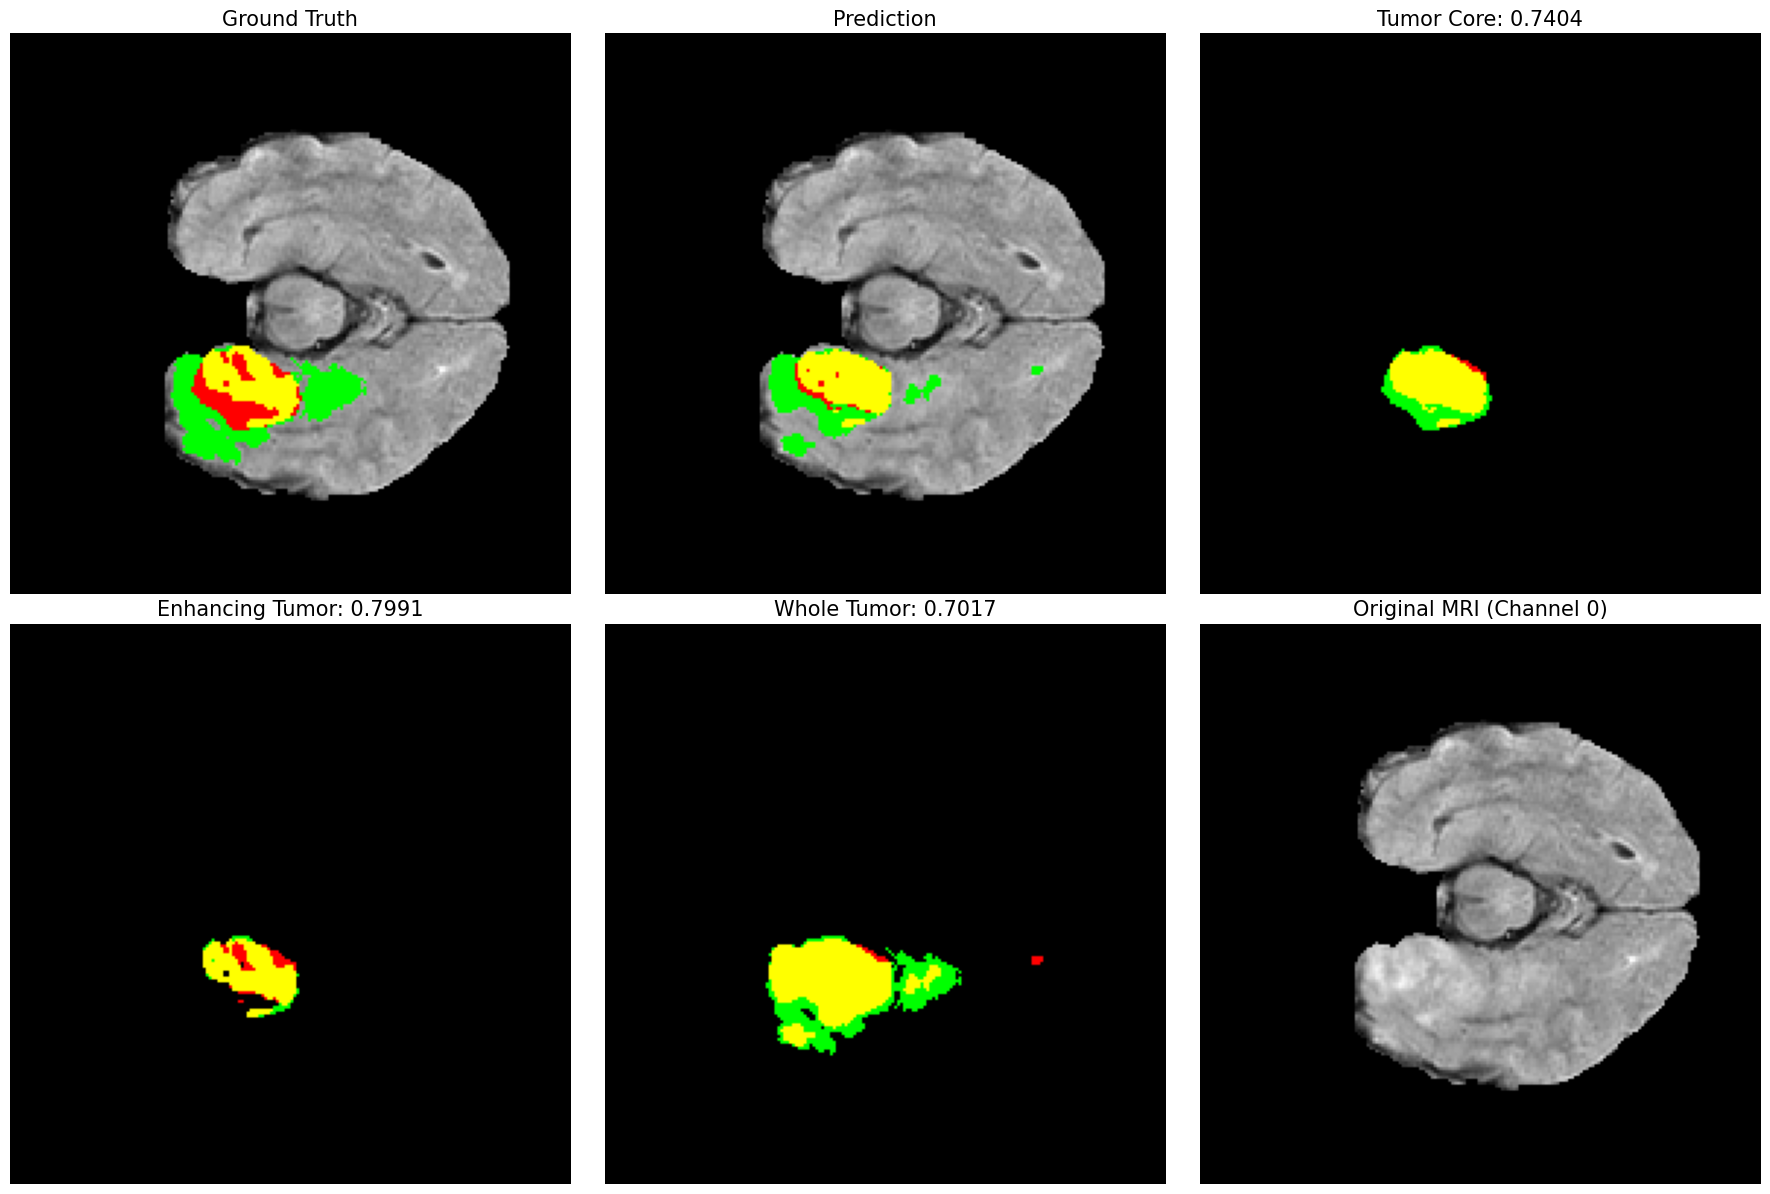

{'dice_coef': 0.9855770490518431, 'mean_iou': 0.9750320260844579, 'class_dice': {'c2': 0.8342527423690005, 'c3': 0.7944706433066507, 'c4': 0.8510951199909536}}

Memory Usage Statistics:
  Peak RAM: 2.53 GB
  Average RAM: 1.57 GB
  RAM Change: 1.18 GB
  Execution Time: 32.24 seconds
8911301 num params
33.99391555786133 param bytes
192 zero params

Memory Usage Statistics:
  Peak RAM: 1.76 GB
  Average RAM: 1.75 GB
  RAM Change: 0.01 GB
  Execution Time: 0.52 seconds
123.26292991638184 avg inference time

Memory Usage Statistics:
  Peak RAM: 1.76 GB
  Average RAM: 1.74 GB
  RAM Change: -0.03 GB
  Execution Time: 1.36 seconds
34.262784004211426 model size

Memory Usage Statistics:
  Peak RAM: 1.72 GB
  Average RAM: 1.72 GB
  RAM Change: 0.00 GB
  Execution Time: 0.11 seconds
15919276032 flops

Memory Usage Statistics:
  Peak RAM: 1.74 GB
  Average RAM: 1.74 GB
  RAM Change: 0.02 GB
  Execution Time: 0.11 seconds

===== SYSTEM INFORMATION =====
System: Darwin 24.3.0 Darwin Kernel Version 2

In [2]:
# %%
# take the model and test 5 images in in validation set

import os
import numpy as np
import time
import matplotlib.pyplot as plt
import torch
from utils.load_data import BrainDataset, get_data_loaders
from architecture.model import load_trained_model, All_view, evaluate_dice_scores, class_dice, arrange_img, dice_coef, mean_iou
import random
from utils.memory_tracker import track_memory_usage, print_memory_stats, print_system_info


device = torch.device("mps")

# %%
# get data
train_loader, val_loader, test_loader = get_data_loaders("../data")

# path = "../model/magnitude/magnitude_pruned_model_30.pth"

# path = "../model/reduce_shared/dlu_net_model_epoch_35.pth"
# path = "../model/shared/dlu_net_model_epoch_35.pth"
# path = "../model/base_model/dlu_net_model_epoch_35.pth"
# path = "../model/depgraph/pruned_dlu_net_ratio_10.pth"
# path = "../model/snip/snip_pruned_model_30.pth"
path = "../model/slimming/slimmed_model_10.pth"

# %%
# from architecture.shared_model import DLUNet, ReASPP3, load_trained_model
# 1. First create a fresh model instance
model = load_trained_model(path)

# model = torch.load(path, map_location=device, weights_only=False)
# model = model.to(device)
# 5. Set model to evaluation mode
model.eval()
print("Model loaded successfully and set to evaluation mode")

# %%


def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
# Get a sample batch from the validation loader
# next() retrieves the first item from the iterator created by iter(val_loader)
# iter() creates an iterator from val_loader which is likely a DataLoader object
# This gets one batch of data containing both images and masks
val_images, val_masks = next(iter(test_loader))
print(f"Batch shape - Images: {val_images.shape}, Masks: {val_masks.shape}")


# Select a random sample from the batch
random_idx = random.randint(0, val_images.shape[0]-1)


print(random_idx)


with torch.no_grad():
    # Get the first sample
    sample_image = val_images[random_idx:random_idx + 1].to(device)
    sample_mask = val_masks[random_idx:random_idx + 1].to(device)

    # Get prediction
    prediction = model(sample_image)
    thresholded_pred = (prediction > 0.2).float()

    # Use the prediction directly for dice calculation instead of calling evaluate_dice_scores
    tc_dice = class_dice(prediction, sample_mask, 2).item()
    ec_dice = class_dice(prediction, sample_mask, 3).item()
    wt_dice = class_dice(prediction, sample_mask, 4).item()

    print(
        f"Sample Dice Scores - Tumor Core: {tc_dice:.4f}, Enhancing Tumor: {ec_dice:.4f}, Whole Tumor: {wt_dice:.4f}")

# Visualize the prediction vs ground truth

# Convert tensors to the right format for visualization
sample_image_np = sample_image.cpu().numpy().transpose(
    0, 2, 3, 1)  # [B,C,H,W] -> [B,H,W,C]
sample_mask_np = sample_mask.cpu().numpy().transpose(0, 2, 3, 1)
pred_np = thresholded_pred.cpu().numpy().transpose(0, 2, 3, 1)

# Use the visualization functions
GT, Pre, TC, EC, WT = arrange_img(
    torch.from_numpy(sample_image_np),
    torch.from_numpy(sample_mask_np),
    torch.from_numpy(pred_np)
)

# Convert tensors to numpy for matplotlib if needed
if isinstance(GT, torch.Tensor):
    GT = GT.numpy()
if isinstance(Pre, torch.Tensor):
    Pre = Pre.numpy()
if isinstance(TC, torch.Tensor):
    TC = TC.numpy()
if isinstance(EC, torch.Tensor):
    EC = EC.numpy()
if isinstance(WT, torch.Tensor):
    WT = WT.numpy()

# Display the results
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

ax[0, 0].imshow(GT)
ax[0, 0].set_title('Ground Truth', fontsize=15)
ax[0, 0].axis("off")

ax[0, 1].imshow(Pre)
ax[0, 1].set_title('Prediction', fontsize=15)
ax[0, 1].axis("off")

ax[0, 2].imshow(TC)
ax[0, 2].set_title(f'Tumor Core: {tc_dice:.4f}', fontsize=15)
ax[0, 2].axis("off")

ax[1, 0].imshow(EC)
ax[1, 0].set_title(f'Enhancing Tumor: {ec_dice:.4f}', fontsize=15)
ax[1, 0].axis("off")

ax[1, 1].imshow(WT)
ax[1, 1].set_title(f'Whole Tumor: {wt_dice:.4f}', fontsize=15)
ax[1, 1].axis("off")

# Display original MRI (first channel)
ax[1, 2].imshow(sample_image_np[0, :, :, 0], cmap='gray')
ax[1, 2].set_title('Original MRI (Channel 0)', fontsize=15)
ax[1, 2].axis("off")

plt.tight_layout()
plt.show()

# %%


def evaluate_model(model, val_loader):
    """
    Evaluate model on validation data.
    """
    model.eval()
    total_dice = 0
    total_iou = 0
    total_class_dice = {2: 0, 3: 0, 4: 0}
    num_batches = 0

    with torch.no_grad():
        for images, masks in val_loader:
            images = images.to(device)
            masks = masks.to(device)
            outputs = model(images)

            # Calculate metrics
            dice = dice_coef(outputs, masks)
            iou = mean_iou(outputs, masks)

            class_dices = {
                2: class_dice(outputs, masks, 2),
                3: class_dice(outputs, masks, 3),
                4: class_dice(outputs, masks, 4)
            }

            total_dice += dice.item()
            total_iou += iou.item()
            for i in [2, 3, 4]:
                total_class_dice[i] += class_dices[i].item()

            num_batches += 1

    # Calculate mean metrics
    mean_metrics = {
        "dice_coef": float(total_dice / num_batches),
        "mean_iou": float(total_iou / num_batches),
        "class_dice": {
            "c2": float(total_class_dice[2] / num_batches),
            "c3": float(total_class_dice[3] / num_batches),
            "c4": float(total_class_dice[4] / num_batches)
        }
    }

    print(mean_metrics)


# %%

@track_memory_usage
def benchmark_inference_speed(model: torch.nn.Module, input_data: torch.Tensor, num_runs: int = 10) -> float:
    """
    Benchmark the inference speed of the model using real input data.

    Args:
        model: The PyTorch model to evaluate
        input_data: Input data for benchmarking
        iterations: Number of inference runs to average over

    Returns:
        Average inference time in seconds per sample
    """
    # Ensure model is in evaluation mode
    model.eval()

    try:
        # Warm up the model
        with torch.no_grad():
            _ = model(input_data)
        times = []
        # Benchmark
        with torch.no_grad():
            for _ in range(num_runs):
                start_time = time.time()
                _ = model(input_data)
                end_time = time.time()
                times.append((end_time - start_time)
                             * 1000)  # Convert to ms

            avg_time = np.mean(times)
            print(avg_time, "avg inference time")
    except RuntimeError as e:
        print(f"Error during inference benchmarking: {e}")
        return 0.0

# %%


@track_memory_usage
def count_parameters(model: torch.nn.Module) -> int:
    """
    Count the number of parameters in the model.

    Args:
        model: The PyTorch model to evaluate

    Returns:
        Total number of parameters
    """
    num_params = sum(p.numel()
                     for p in model.parameters() if p.requires_grad)
    print(num_params, "num params")
    # compute memory footprint of parameters in MB
    param_bytes = sum(p.numel() * p.element_size()
                      for p in model.parameters() if p.requires_grad)
    print(param_bytes / (1024 * 1024), "param bytes")

    # get number of zero parameters
    zero_params = sum((p == 0).sum().item()
                      for p in model.parameters() if p.requires_grad)
    print(zero_params, "zero params")
    return num_params

# %%


@track_memory_usage
def measure_flops(model: torch.nn.Module, input_shape: tuple) -> float:
    """
    Measure model FLOPs using ptflops.
    """
    from ptflops import get_model_complexity_info
    # ptflops expects a Python tuple of (C, H, W), not batch size or torch.Size
    # Drop batch dim if present, then cast to tuple
    if len(input_shape) > 3:
        input_res = tuple(input_shape[1:])
    else:
        input_res = tuple(input_shape)
    macs, _ = get_model_complexity_info(
        model,
        input_res,
        as_strings=False,
        print_per_layer_stat=False
    )
    flops = 2 * macs  # approximate FLOPs from MACs
    print(flops, "flops")
    return flops


# %%
@track_memory_usage
def get_model_size(model_path: str) -> float:
    size_mb = os.path.getsize(model_path) / (1024 * 1024)
    print(size_mb, "model size")
    return size_mb

# %%
# Apply memory tracking to the evaluate_model function
evaluate_result = track_memory_usage(evaluate_model)(model, test_loader)
if isinstance(evaluate_result, tuple) and len(evaluate_result) > 0:
    # If result is a tuple, memory stats should be in the second element
    print_memory_stats(evaluate_result[1])
elif isinstance(evaluate_result, dict) and "memory_stats" in evaluate_result:
    # If result is a dict with memory_stats key
    print_memory_stats(evaluate_result["memory_stats"])
elif isinstance(evaluate_result, dict):
    # If result is a dict that is itself the memory stats
    print_memory_stats(evaluate_result)

count_parameters_result = count_parameters(model)
if isinstance(count_parameters_result, tuple) and len(count_parameters_result) > 0:
    if isinstance(count_parameters_result[1], dict) and "memory_stats" in count_parameters_result[1]:
        print_memory_stats(count_parameters_result[1]["memory_stats"])
    else:
        print_memory_stats(count_parameters_result[1])

benchmark_result = benchmark_inference_speed(
    model, next(iter(test_loader))[0].to(device))
if isinstance(benchmark_result, tuple) and len(benchmark_result) > 0:
    if isinstance(benchmark_result[1], dict) and "memory_stats" in benchmark_result[1]:
        print_memory_stats(benchmark_result[1]["memory_stats"])
    else:
        print_memory_stats(benchmark_result[1])

size_result = get_model_size(path)
if isinstance(size_result, tuple) and len(size_result) > 0:
    if isinstance(size_result[1], dict) and "memory_stats" in size_result[1]:
        print_memory_stats(size_result[1]["memory_stats"])
    else:
        print_memory_stats(size_result[1])

flops_result = measure_flops(model, next(iter(test_loader))[0].shape)
if isinstance(flops_result, tuple) and len(flops_result) > 0:
    if isinstance(flops_result[1], dict) and "memory_stats" in flops_result[1]:
        print_memory_stats(flops_result[1]["memory_stats"])
    else:
        print_memory_stats(flops_result[1])

# Print detailed system information including GPU details
print_system_info()

# %%